# **Part 1: Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#Load the Dataset
df = pd.read_csv('Netflix_Userbase.csv')
print(data.head())

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  


In [ ]:
#Missing Values
print("Missing Values\n")
print(df.isnull().sum())

Missing Values

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


In [ ]:
#Encode Categorical Variables
categorical_variables = pd.get_dummies(data, columns=['Subscription Type', 'Country', 'Gender', 'Device', 'Join Date', 'Last Payment Date', 'Plan Duration'])
print(categorical_variables)

      User ID  Monthly Revenue  Age  Subscription Type_Basic  \
0           1               10   28                        1   
1           2               15   35                        0   
2           3               12   42                        0   
3           4               12   51                        0   
4           5               10   33                        1   
...       ...              ...  ...                      ...   
2495     2496               14   28                        0   
2496     2497               15   33                        1   
2497     2498               12   38                        0   
2498     2499               13   48                        0   
2499     2500               15   35                        1   

      Subscription Type_Premium  Subscription Type_Standard  \
0                             0                           0   
1                             1                           0   
2                             0           

In [ ]:
#Feature Selection
print(df.columns)

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')


In [ ]:
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies['Income'] = (data['Monthly Revenue']>1).astype(int)

X = data_dummies.drop(['Age', 'Monthly Revenue'], axis=1)
Y = data_dummies['Income']

# **Part 2: Exploratory Data Analysis (EDA)**

In [ ]:
#Descriptive Statistics
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


**Visualization**

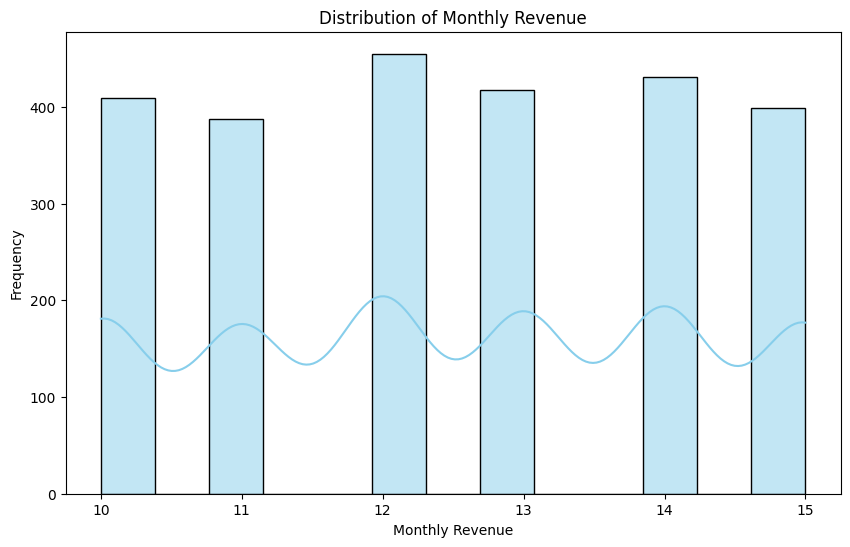

In [ ]:
#Monthly Revenue
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Monthly Revenue', kde=True, color='skyblue')
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

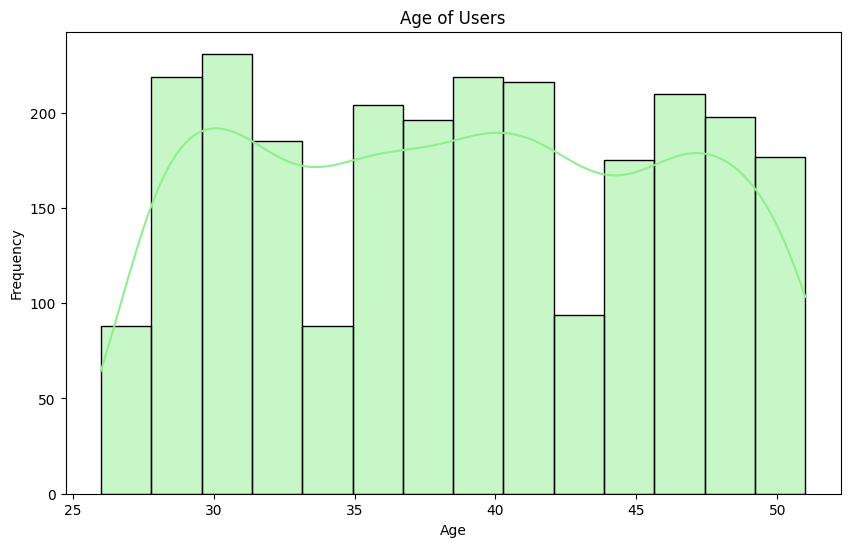

In [ ]:
#Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True, color='lightgreen')
plt.title('Age of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-147-e9802c4b5583>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


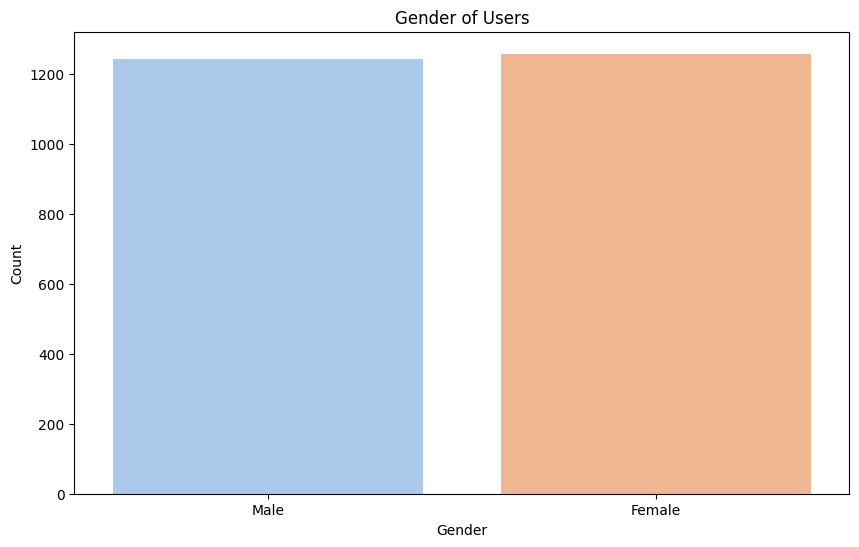

In [ ]:
#Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender of Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<ipython-input-142-fcf98d2fd164>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Subscription Type', palette='pastel')


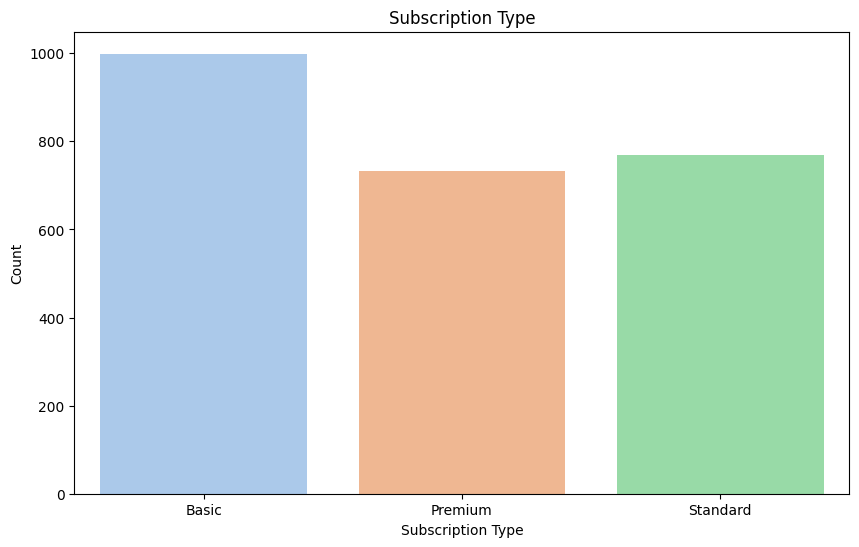

In [ ]:
#Subscription Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Subscription Type', palette='pastel')
plt.title('Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()

<ipython-input-144-f68adc98991c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Country', palette='pastel')


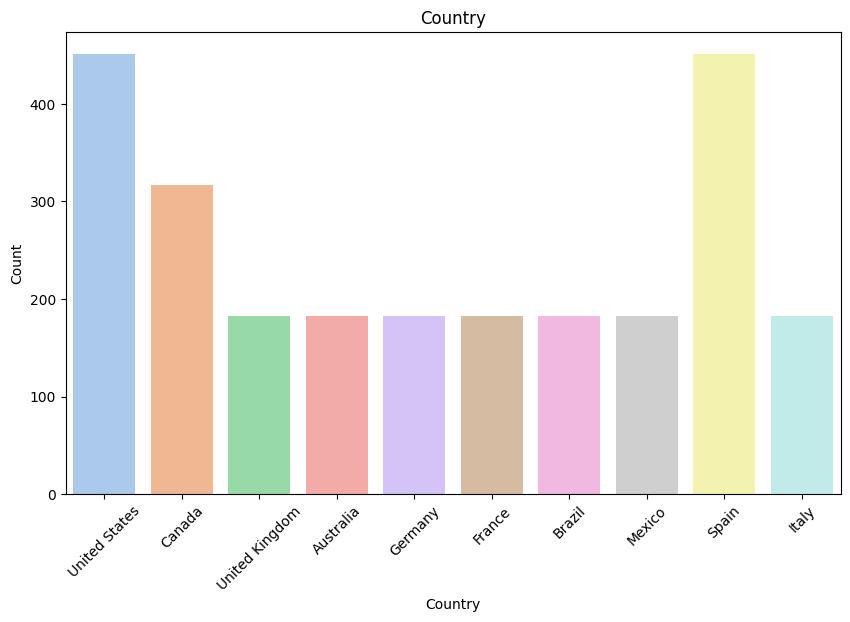

In [ ]:
#Country
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country', palette='pastel')
plt.title('Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-143-350d6616e351>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Device', palette='pastel')


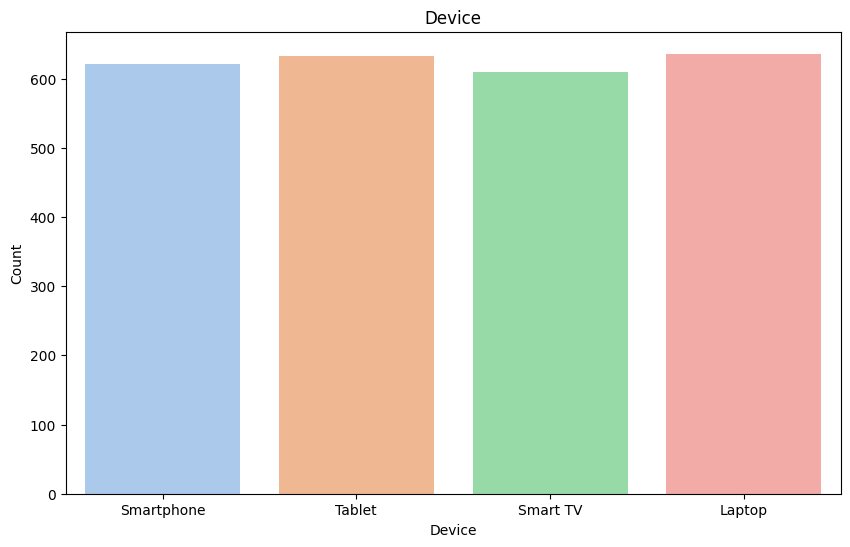

In [ ]:
#Device
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Device', palette='pastel')
plt.title('Device')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()

# **Part 3: Linear Regression Model (Predicting Monthly Revenue)**

In [ ]:
#Build the model
x = data.drop('Monthly Revenue', axis=1)
y = data[['Monthly Revenue']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

In [ ]:
x = data[['Monthly Revenue']]
y = data['Age']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x,y)

LinearRegression()

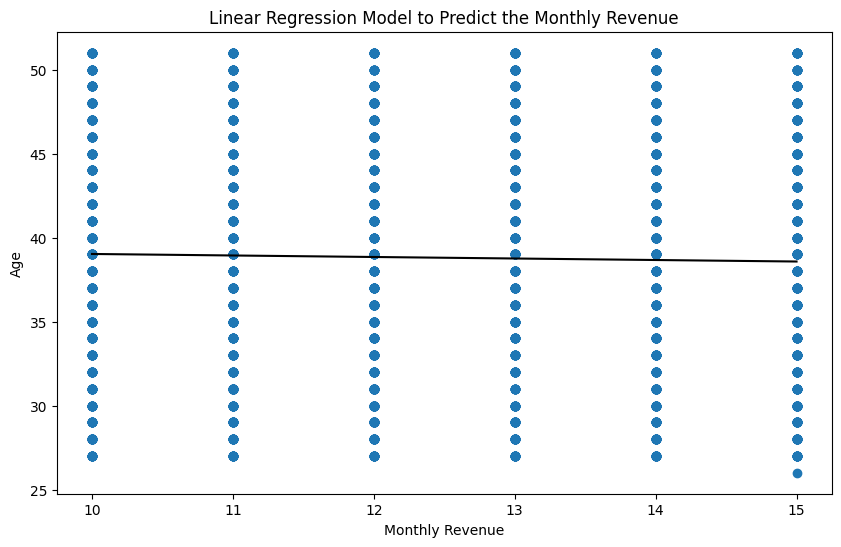

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x,y)
plt.plot(x,model.predict(x),color='Black')
plt.xlabel('Monthly Revenue')
plt.ylabel('Age')
plt.title('Linear Regression Model to Predict the Monthly Revenue')
plt.show()

In [ ]:
slope = model.coef_[0]
intercept = model.intercept_
print("Slope: ", slope)
print("Intercept: ", intercept)

Slope:  -0.08989220320414054
Intercept:  39.92000763455867


In [ ]:
#Evaluation
linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
predictions = linear_model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 51.66943035503506
Root Mean Squared Error (RMSE): 7.18814512618068
R-squared Score: -0.003937186123555536


# **Part 4: Logistic Regression Model (Predicting Customer Feedback)**

In [ ]:
#Model Building

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
#Evaluation
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix: ")
print(conf_matrix)
print("Classification Report: ")
print(class_report)

Accuracy: 0.036
Confusion Matrix: 
[[ 0  0  0  8  1  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  6  0  0
   0]
 [ 0  0  0 13  4  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  8  0  0
   0]
 [ 0  0  0  9  2  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  3  0  0
   0]
 [ 0  0  0  9  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0
   0]
 [ 0  0  0  9  4  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  3  0  0
   0]
 [ 0  0  0  6  5  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  4  0  0
   0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  5  0  0
   0]
 [ 0  0  0 10  2  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  4  0  0
   0]
 [ 0  0  0  5  4  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  2  0  0
   0]
 [ 0  0  0  8  6  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  3  0  0
   0]
 [ 0  0  0 13  4  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  6  0  0
   0]
 [ 0  0  0 11  2  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  2  0  0
   0]
 [ 0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Part 5: Comparative Analysis and Visualization**

***Feature Importance:***

  In the linear regression model for predicting monthly revenue, parts like 'Income' and 'age' show their effect on revenue. If the numbers (coefficients) are positive, it means more of that feature leads to more monthly revenue. If they're negative, more of the feature leads to less revenue. The size of these parts tells us how strong their effect is on earnings. In the logistic regression model used to predict customer feedback, the coefficients show how much and in what way they affect the chances of getting positive feedback. Looking at these coefficients helps us understand what matters most to customers and how satisfied they are. Plus, we can use statistical tests to confirm how important these coefficients are in both regression models.

Insights:

Both linear and logistic regression are influenced by the features. For example, consider the 'plan duration' feature. If a user chooses a shorter duration, it will result in less revenue. Similarly, the 'subscription type' feature also has an impact. If most subscribers choose the premium type, it will lead to greater revenue for the company.